## Data Exploration, Cleaning, and Analysis

This section involves loading historical stock data from Yahoo Finance and inspecting its structure. The data is cleaned by making sure there are no missing values and ensuring the correct formats. 

Exploratory Data Analysis (EDA) is performed, including visualizing stock price trends, calculating daily returns, analyzing correlations, and assessing key financial metrics such as cumulative returns and volatility. 

These steps help identify important patterns and trends in the semiconductor industry from 2015 to 2023.


### Load and Inspect the Data

This section loads the stock data from the CSV file, inspects the structure, and checks for missing values. 

Additionally, the 'Date' column is converted to the proper datetime format.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('semiconductor_stock_data.csv')

# Inspect the first 10 rows of the data
print(data.head(10))


         Date      NVDA       INTC   AMD       QCOM        TSM
0  2015-01-02  0.483177  27.896463  2.67  55.841820  16.909441
1  2015-01-05  0.475016  27.581898  2.66  55.578712  16.499603
2  2015-01-06  0.460614  27.067846  2.63  54.789341  16.211205
3  2015-01-07  0.459414  27.635607  2.58  55.428360  16.446474
4  2015-01-08  0.476696  28.149651  2.61  56.014748  16.552731
5  2015-01-09  0.478616  28.203344  2.63  55.947067  16.089775
6  2015-01-12  0.472616  28.080589  2.63  55.308064  15.778603
7  2015-01-13  0.471895  28.003868  2.66  54.857006  15.975929
8  2015-01-14  0.473816  27.888784  2.63  54.293179  15.983519
9  2015-01-15  0.470455  27.766020  2.52  53.661690  17.372400


In [3]:
# Check the structure and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2264 non-null   object 
 1   NVDA    2264 non-null   float64
 2   INTC    2264 non-null   float64
 3   AMD     2264 non-null   float64
 4   QCOM    2264 non-null   float64
 5   TSM     2264 non-null   float64
dtypes: float64(5), object(1)
memory usage: 106.2+ KB
None


**No Missing Data:**

From the result above the "Non-Null Count" for all columns, including Date, is 2264, which matches the total number of entries (rows). This means there are no missing values in any of the columns.

**Date Column Format:**

The Date column has a data type of object, which indicates that the Date column is currently stored as a string (text) rather than a proper datetime format. To ensure the Date column is in the correct format, we should convert it to datetime using the following code

In [4]:
# Convert 'Date' column to datetime if necessary
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Checking if the 'Date' converted
print(data.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2264 non-null   datetime64[ns]
 1   NVDA    2264 non-null   float64       
 2   INTC    2264 non-null   float64       
 3   AMD     2264 non-null   float64       
 4   QCOM    2264 non-null   float64       
 5   TSM     2264 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 106.2 KB
None


In [5]:
# Set 'Date' as index
data.set_index('Date', inplace=True)

#Printing data to make sure it looks as expected 
print(data.head(5))

                NVDA       INTC   AMD       QCOM        TSM
Date                                                       
2015-01-02  0.483177  27.896463  2.67  55.841820  16.909441
2015-01-05  0.475016  27.581898  2.66  55.578712  16.499603
2015-01-06  0.460614  27.067846  2.63  54.789341  16.211205
2015-01-07  0.459414  27.635607  2.58  55.428360  16.446474
2015-01-08  0.476696  28.149651  2.61  56.014748  16.552731


### Visualise Stock Price Trends

This section plots stock price trends over time using the adjusted close prices, helping to observe overall movements and fluctuations.


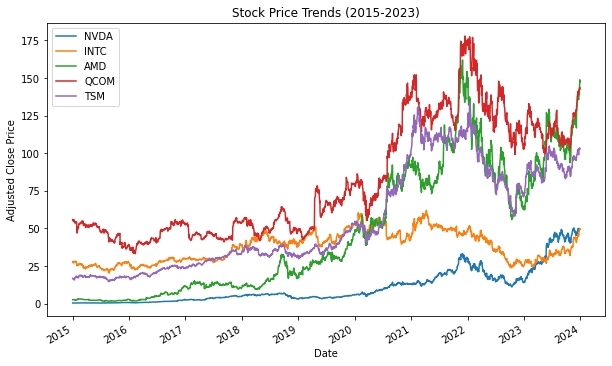

In [6]:
# Visualise stock price trends over time
data.plot(figsize=(10, 6))
plt.title('Stock Price Trends (2015-2023)')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Date')
plt.show()

#### Stock Price Trends Observations:

**2020-2021 Surge:** Most of the stocks show significant upward movement during the 2020-2021 period, likely due to increased demand for semiconductors during the pandemic and the global chip shortage.

**Top Performers:** NVIDIA and AMD appear to be the top performers in terms of growth, especially in the 2020-2021 period.

**Steady Growth:** TSMC shows consistent long-term growth with less volatility than its competitors.

**Underperformer:** Intel stands out as an underperformer in comparison, with relatively flat stock price movement across the period.

### Calculate and Visualise Moving Averages

This section calculates the 30-day, 90-day, and 200-day moving averages for each stock, smoothing out short-term fluctuations to highlight longer-term trends. These moving averages are useful for analysing potential signals in a moving average crossover strategy, which could be applied in backtesting to identify buy or sell opportunities based on crossovers between short- and long-term averages.


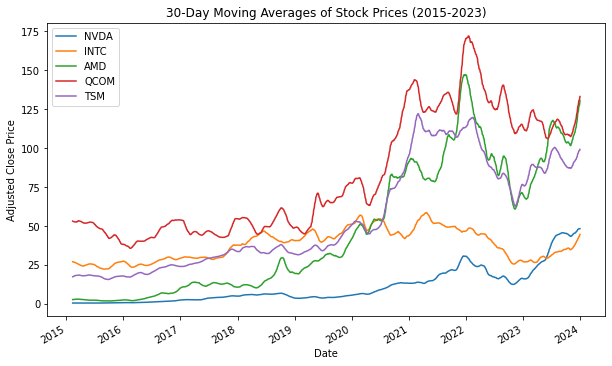

In [7]:
# Calculate a 30-day moving average for each stock
moving_averages = data.rolling(window=30).mean()

# Plot the moving averages
moving_averages.plot(figsize=(10, 6))
plt.title('30-Day Moving Averages of Stock Prices (2015-2023)')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Date')
plt.show()


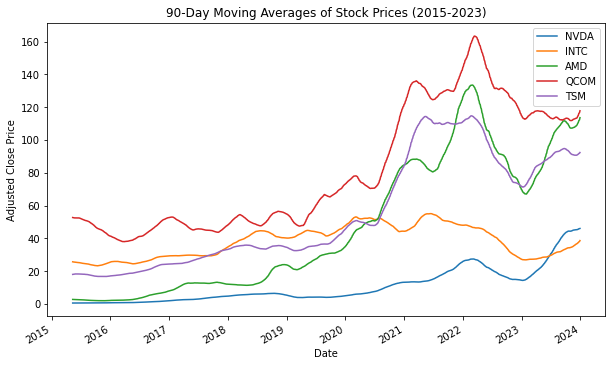

In [8]:
# Calculate a 90-day moving average for each stock
moving_averages = data.rolling(window=90).mean()

# Plot the moving averages
moving_averages.plot(figsize=(10, 6))
plt.title('90-Day Moving Averages of Stock Prices (2015-2023)')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Date')
plt.show()

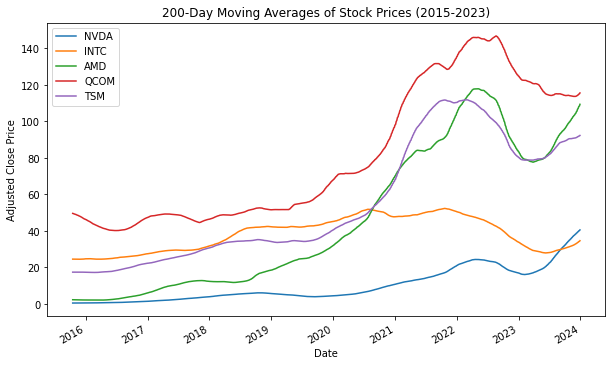

In [9]:
# Calculate a 200-day moving average for each stock
moving_averages = data.rolling(window=200).mean()

# Plot the moving averages
moving_averages.plot(figsize=(10, 6))
plt.title('200-Day Moving Averages of Stock Prices (2015-2023)')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Date')
plt.show()

### Calculate and Visualise Daily Returns

This section calculates daily returns for each stock to show day-to-day percentage changes. A plot is generated to view stock volatility.


<function matplotlib.pyplot.show(close=None, block=None)>

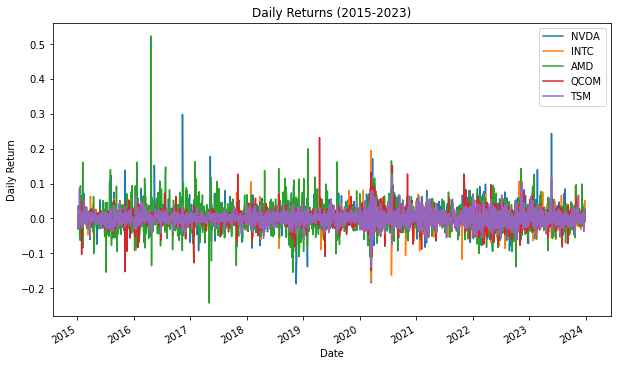

In [17]:
# Calculate daily returns
returns = data.pct_change()

# Plot daily returns
returns.plot(figsize=(10, 6))
plt.title('Daily Returns (2015-2023)')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.show


### Daily Returns Observations 

NVIDIA and AMD show the largest daily return spikes, suggesting they are more volatile and reactive to market events.

TSMC appears to have the most stable daily returns, with less extreme fluctuations compared to the others.


### Analyse Correlation Between Stocks

This section calculates the correlation between stock returns for different companies. A heatmap is used to visualise how the stocks move in relation to each other.


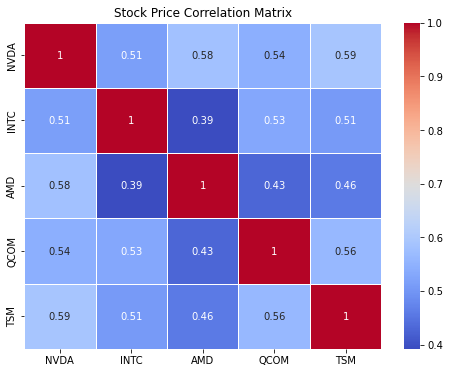

In [11]:
# Compute correlation between stock returns
corr_matrix = returns.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Stock Price Correlation Matrix')
plt.show()


### Stock Price Correlation Matrix Observations

All stocks have positive correlations with each other, ranging from weak to moderate.

NVDA has the highest overall correlations with other stocks, particularly with AMD (0.58) and TSM (0.59).

AMD shows the lowest correlations with other stocks, especially with INTC (Intel) at 0.39.

No pairs of stocks show very strong correlations (>0.7), indicating some diversification benefits within this group.

### Calculate and Plot Cumulative Returns

Cumulative returns are calculated for each stock to see the total return over time, assuming the investment was held throughout the period. This helps assess the overall performance of each stock.


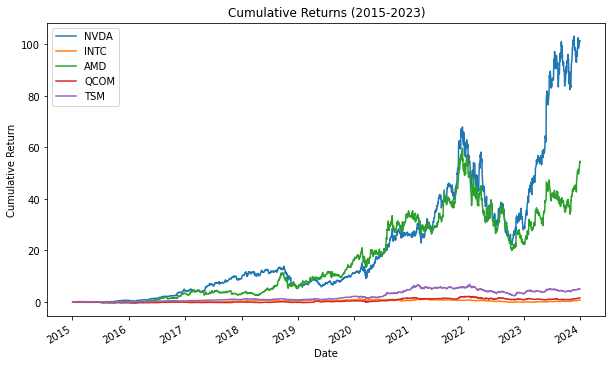

In [12]:
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Cumulative Returns (2015-2023)')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.show()

### Cumulative Returns Observations

NVDA has significantly outperformed all other stocks, showing explosive growth especially from 2020 onwards, with cumulative returns exceeding 100% by 2023.

AMD has been the second-best performer, with strong growth particularly from 2019 to 2021, though it experienced more volatility than NVDA.

TSM shows moderate but steady growth, maintaining a relatively stable upward trend throughout the period.

QCOM and INTC have shown the weakest performance, with their cumulative returns remaining close to 0% over the entire period.

All stocks experienced a noticeable dip in early 2020, likely due to the COVID-19 pandemic, but most recovered quickly.

There's significant divergence in performance between the top performers (NVDA, AMD) and the others, especially from 2020 onwards.

The semiconductor industry appears to have experienced substantial growth overall during this period, but with clear winners and laggards.

### Assess Rolling Volatility

This section calculates rolling volatility using a 30-day rolling standard deviation of daily returns. The rolling volatility is plotted to observe periods of higher or lower volatility over time.


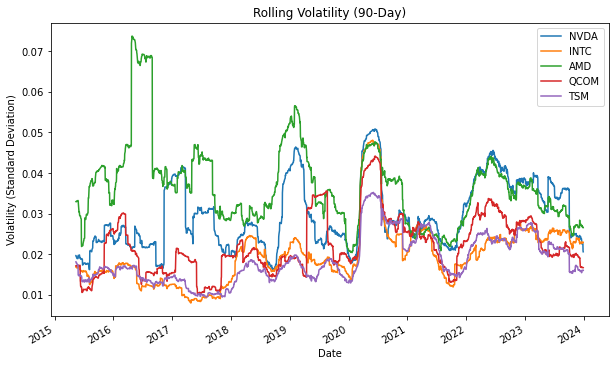

In [13]:
# Calculate rolling volatility (e.g., 90-day rolling standard deviation)
volatility = returns.rolling(window=90).std()

# Plot rolling volatility
volatility.plot(figsize=(10, 6))
plt.title('Rolling Volatility (90-Day)')
plt.ylabel('Volatility (Standard Deviation)')
plt.xlabel('Date')
plt.show()


### Rolling Volatility Observations

AMD exhibits the highest and most volatile fluctuations throughout the period, peaking multiple times, especially around 2016, 2020, and 2021. 

NVIDIA also shows significant volatility, with peaks around 2020 and 2021, likely corresponding to market disruptions and rapid growth during that time. 

Qualcomm and TSMC display relatively moderate and consistent volatility, with smaller spikes compared to AMD and NVIDIA. 

Intel has the lowest volatility overall, remaining more stable over time, though it slightly increased post-2020. 

Across all stocks, there's a visible increase in volatility around the 2020-2021 period, which coincides with the global economic disruptions due to the COVID-19 pandemic.

### Calculate the Sharpe Ratio

The Sharpe Ratio is used to evaluate the risk-adjusted return of each stock. It compares the average daily return to the risk-free rate and adjusts for the stock's volatility. A higher Sharpe Ratio indicates a better risk-adjusted return. For this calculation, a risk-free rate of 1% per year is assumed.


In [14]:
# Assuming a risk-free rate of 0.01 (1% per year)
risk_free_rate = 0.01

# Calculate the average daily returns and daily volatility (standard deviation of returns)
avg_returns = returns.mean()
volatility = returns.std()

# Calculate the Sharpe Ratio for each stock
sharpe_ratios = (avg_returns - risk_free_rate) / volatility
print(sharpe_ratios)

# Check the data type of the Series
print(sharpe_ratios.dtype)


NVDA   -0.247145
INTC   -0.451762
AMD    -0.200316
QCOM   -0.403212
TSM    -0.463632
dtype: float64
float64


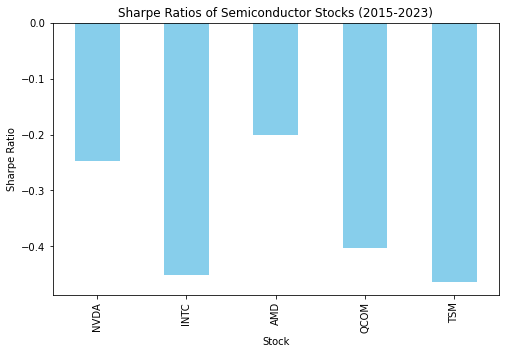

In [15]:
# Plot sharpe ratios
sharpe_ratios.plot(kind='bar', figsize=(8, 5), color='skyblue')

# Add labels and title
plt.title('Sharpe Ratios of Semiconductor Stocks (2015-2023)')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Stock')

# Show the plot
plt.show()

### Sharpe Ratios Observations 

All the semiconductor stocks have negative Sharpe Ratios, meaning their returns were worse than a risk-free asset. Intel and TSMC show the lowest ratios, indicating the weakest performance. AMD and Qualcomm also performed poorly, while NVIDIA had the least negative ratio but still underperformed relative to its risk. Overall, these stocks did not compensate well for the risks taken by investors.